In [9]:
#Importing the Libraries
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
all_data = pd.read_csv("HDFCBANK.csv")
#all_data=all_data.drop(['Date','Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
df=all_data.drop(['Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
df.head()


Date  Prev Close   Open    High    Low   Last   Close    VWAP  \
0  2000-01-03      271.75  293.5  293.50  293.5  293.5  293.50  293.50   
1  2000-01-04      293.50  317.0  317.00  297.0  304.0  304.05  303.62   
2  2000-01-05      304.05  290.0  303.90  285.0  295.0  292.80  294.53   
3  2000-01-06      292.80  301.0  314.00  295.0  296.0  296.45  300.14   
4  2000-01-07      296.45  290.0  296.35  281.0  287.1  286.55  288.80   

   Volume      Turnover  
0   22744  6.675364e+11  
1  255251  7.749972e+12  
2  269087  7.925368e+12  
3  305916  9.181669e+12  
4  197039  5.690480e+12

#Understanding df.info()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577 entries, 0 to 5576
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5577 non-null   object 
 1   Prev Close  5577 non-null   float64
 2   Open        5577 non-null   float64
 3   High        5577 non-null   float64
 4   Low         5577 non-null   float64
 5   Last        5577 non-null   float64
 6   Close       5577 non-null   float64
 7   VWAP        5577 non-null   float64
 8   Volume      5577 non-null   int64  
 9   Turnover    5577 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 435.8+ KB


1.Data has only float and integer values.

2.No variable column has null/missing values.


#Understanding df.describe()

In [12]:
df.describe()

Prev Close         Open         High          Low         Last  \
count  5577.000000  5577.000000  5577.000000  5577.000000  5577.000000   
mean   1344.670495  1345.458849  1365.672700  1323.960687  1344.878734   
std     745.548053   745.932412   756.996316   734.165995   745.378105   
min     271.750000   284.000000   290.500000   273.250000   282.850000   
25%     673.950000   674.900000   683.000000   665.000000   674.700000   
50%    1196.600000  1195.500000  1213.800000  1176.550000  1197.100000   
75%    1906.750000  1912.000000  1936.650000  1883.200000  1908.450000   
max    3180.150000  3148.000000  3262.000000  3100.550000  3178.000000   

             Close         VWAP        Volume      Turnover  
count  5577.000000  5577.000000  5.577000e+03  5.577000e+03  
mean   1345.051452  1344.672867  1.935557e+06  2.937944e+14  
std     745.530414   745.274861  3.005648e+06  4.092080e+14  
min     283.850000   283.600000  2.919000e+03  1.834686e+11  
25%     674.000000   673.680000  3.286290e+05  2.857861e+13  
50%    1198.200000  1194.410000  1.500915e+06  1.819566e+14  
75%    1907.450000  1909.610000  2.819929e+06  3.857485e+14  
max    3180.150000  3166.580000  1.584141e+08  1.043773e+16

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

1.The mean value is gretaer than median value of each column which is represented by 50%(50th percentile) in index column meaning Data has positive skewed distribution.

2.There is notably a large difference between 75th %tile and max values of most of the feature variables.
Thus observations 1 and 2 suggests that there are extreme values-Outliers in our data set.

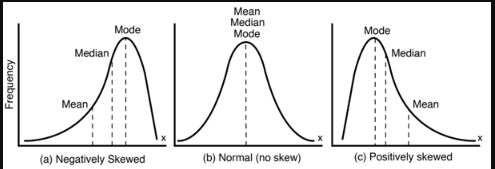

In [13]:
df.Close.unique()
df.Close.value_counts()

array([ 293.5 ,  304.05,  292.8 , ..., 2287.75, 2330.4 , 2367.25])

666.80     4
659.85     4
644.65     3
555.60     3
683.90     3
          ..
3060.75    1
3169.40    1
3112.10    1
2944.95    1
2367.25    1
Name: Close, Length: 5128, dtype: int64

Target variable/Dependent variable is numerical in nature.

Python has a visualization library ,Seaborn which build on top of matplotlib. It provides very attractive statistical graphs in order to perform both Univariate and Multivariate analysis.

To use linear regression for modelling,its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.

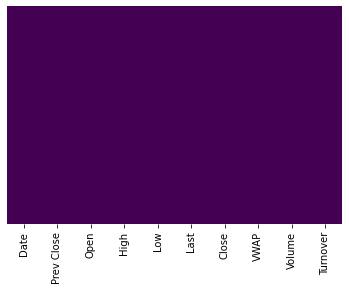

In [14]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

<Figure size 432x288 with 0 Axes>

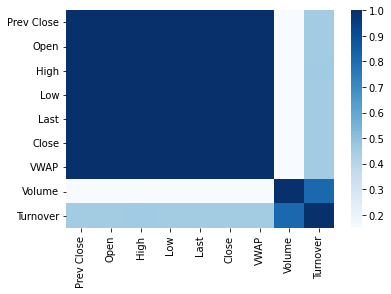

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

Dark shades represents positive correlation while lighter shades represents negative correlation.If you set annot=True, you'll get values by which features are correlated to each other in grid-cells

<Figure size 720x360 with 0 Axes>

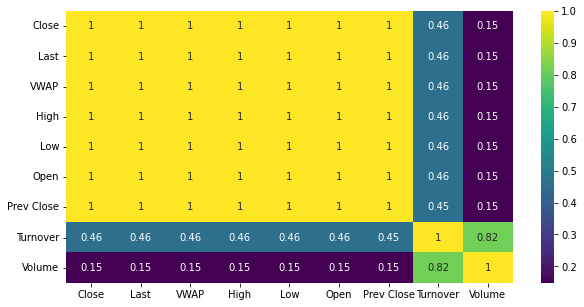

In [16]:
#Quality correlation matrix
k = 9 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Close')['Close'].index
cm = df[cols].corr()
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [17]:
df=df.drop(['Date'],axis=1)
df.head()

Prev Close   Open    High    Low   Last   Close    VWAP  Volume  \
0      271.75  293.5  293.50  293.5  293.5  293.50  293.50   22744   
1      293.50  317.0  317.00  297.0  304.0  304.05  303.62  255251   
2      304.05  290.0  303.90  285.0  295.0  292.80  294.53  269087   
3      292.80  301.0  314.00  295.0  296.0  296.45  300.14  305916   
4      296.45  290.0  296.35  281.0  287.1  286.55  288.80  197039   

       Turnover  
0  6.675364e+11  
1  7.749972e+12  
2  7.925368e+12  
3  9.181669e+12  
4  5.690480e+12

#To check Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2e049abb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2e04aa2b0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7ff2e049a7f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff2e04aa970>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2e04aac70>,
 'means': []}

([<matplotlib.axis.XTick at 0x7ff2e0482c40>,
 [Text(0, 0, 'Prev Close'),
  Text(0, 0, 'Open'),
  Text(0, 0, 'High'),
  Text(0, 0, 'Low'),
  Text(0, 0, 'Last'),
  Text(0, 0, 'VWAP'),
  Text(0, 0, 'Close')])

Text(0.5, 1.0, 'Customized box plot for HDFC DATASET')

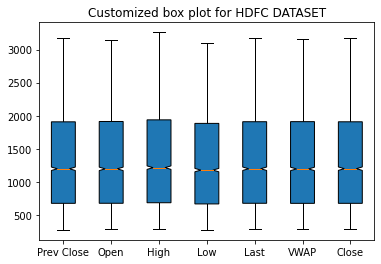

In [18]:
fig, ax = plt.subplots()
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"], df["Close"]]
ax.boxplot(columns, notch=True, patch_artist=True)
plt.xticks([1, 2,3,4,5,6,7], ['Prev Close', 'Open','High', 'Low','Last', 'VWAP','Close'])
# Adding title
plt.title("Customized box plot for HDFC DATASET")
plt.show()


In [19]:
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"], df["Close"]]
Prev_Close_list=df['Prev Close'].tolist()
Open_list=df['Open'].tolist()
High_list=df['High'].tolist()
Low_list=df['Low'].tolist()
Last_list=df['Last'].tolist()
VWAP_list=df['VWAP'].tolist()
Close_list=df['Close'].tolist()
total=len(Close_list);
TARGET0=[]
TARGET1=[]
TARGET2=[]
TARGET3=[]
TARGET4=[]
TARGET5=[]
TARGET6=[]
for j in range(0,len(columns)):
  median = np.median(columns[j])
  upper_quartile = np.percentile(columns[j], 75)
  lower_quartile = np.percentile(columns[j], 25)
  iqr = upper_quartile - lower_quartile
  upper_whisker = columns[j][columns[j]<=upper_quartile+1.5*iqr].max()
  lower_whisker = columns[j][columns[j]>=lower_quartile-1.5*iqr].min()
  for i in range(0,total):
   
      if(j==0):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET0.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET0.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET0.append('lower_whisker')
        else:
          TARGET0.append('dontcare')
      elif(j==1):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET1.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET1.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET1.append('lower_whisker')
        else:
          TARGET1.append('dontcare')
      elif(j==2):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET2.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET2.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET2.append('lower_whisker')
        else:
          TARGET2.append('dontcare')
      elif(j==3):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET3.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET3.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET3.append('lower_whisker')
        else:
          TARGET3.append('dontcare')
      elif(j==4):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET4.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET4.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET4.append('lower_whisker')
        else:
          TARGET4.append('dontcare')
      elif(j==5):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET5.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET5.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET5.append('lower_whisker')
        else:
          TARGET5.append('dontcare')
      elif(j==6):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET6.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET6.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET6.append('lower_whisker')
        else:
          TARGET6.append('dontcare')

In [20]:
df0=pd.DataFrame(TARGET0)
df1=pd.DataFrame(TARGET1)
df2=pd.DataFrame(TARGET2)
df3=pd.DataFrame(TARGET3)
df4=pd.DataFrame(TARGET4)
df5=pd.DataFrame(TARGET5)
df6=pd.DataFrame(TARGET6)
df['Prev_Close_list']=df0
df['Open_list']=df1
df['High_list']=df2
df['Low_list']=df3
df['Last_list']=df4
df['VWAP_list']=df5
df['Close_list']=df6
df.head(10)

Prev Close   Open    High     Low    Last   Close    VWAP  Volume  \
0      271.75  293.5  293.50  293.50  293.50  293.50  293.50   22744   
1      293.50  317.0  317.00  297.00  304.00  304.05  303.62  255251   
2      304.05  290.0  303.90  285.00  295.00  292.80  294.53  269087   
3      292.80  301.0  314.00  295.00  296.00  296.45  300.14  305916   
4      296.45  290.0  296.35  281.00  287.10  286.55  288.80  197039   
5      286.55  292.0  296.00  285.00  288.40  287.20  289.42  133363   
6      287.20  290.0  292.00  273.25  282.85  283.85  284.54  337411   
7      283.85  287.0  293.00  284.50  285.25  285.60  287.60  222537   
8      285.60  288.0  290.50  283.00  284.00  283.85  285.84  113238   
9      283.85  284.0  294.00  276.25  291.00  286.55  283.60  152322   

       Turnover Prev_Close_list Open_list High_list  Low_list Last_list  \
0  6.675364e+11        dontcare  dontcare  dontcare  dontcare  dontcare   
1  7.749972e+12        dontcare  dontcare  dontcare  dontcare  dontcare   
2  7.925368e+12        dontcare  dontcare  dontcare  dontcare  dontcare   
3  9.181669e+12        dontcare  dontcare  dontcare  dontcare  dontcare   
4  5.690480e+12        dontcare  dontcare  dontcare  dontcare  dontcare   
5  3.859779e+12        dontcare  dontcare  dontcare  dontcare  dontcare   
6  9.600617e+12        dontcare  dontcare  dontcare  dontcare  dontcare   
7  6.400217e+12        dontcare  dontcare  dontcare  dontcare  dontcare   
8  3.236741e+12        dontcare  dontcare  dontcare  dontcare  dontcare   
9  4.319905e+12        dontcare  dontcare  dontcare  dontcare  dontcare   

  VWAP_list Close_list  
0  dontcare   dontcare  
1  dontcare   dontcare  
2  dontcare   dontcare  
3  dontcare   dontcare  
4  dontcare   dontcare  
5  dontcare   dontcare  
6  dontcare   dontcare  
7  dontcare   dontcare  
8  dontcare   dontcare  
9  dontcare   dontcare

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

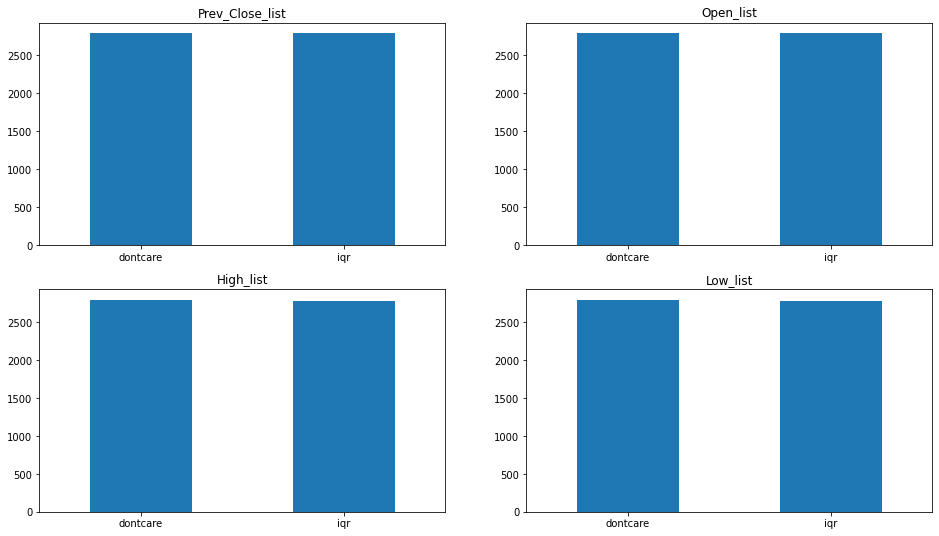

In [21]:
plt.subplot(221)
df['Prev_Close_list'].value_counts().plot(kind='bar', title='Prev_Close_list', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(222)
df['Open_list'].value_counts().plot(kind='bar', title='Open_list', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(223)
df['High_list'].value_counts().plot(kind='bar', title='High_list', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(224)
df['Low_list'].value_counts().plot(kind='bar', title='Low_list', figsize=(16,9))
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

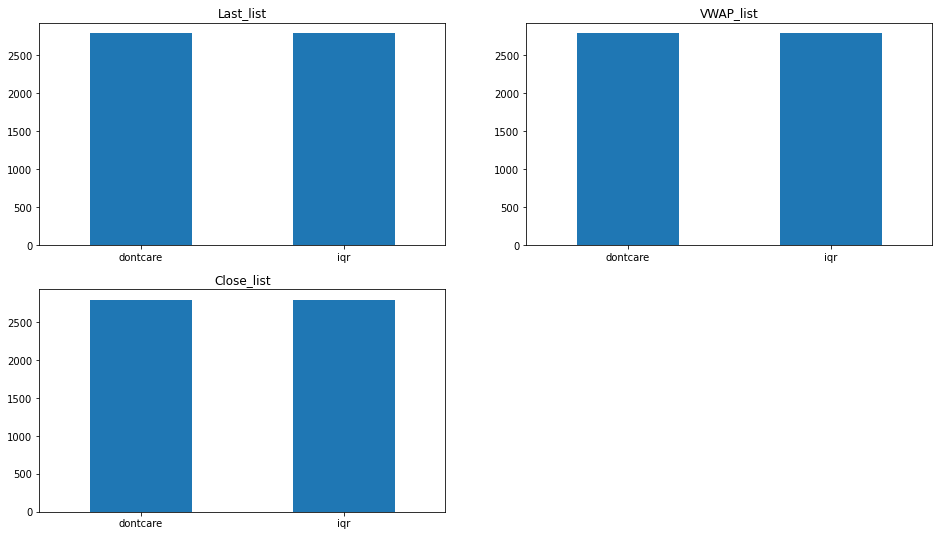

In [22]:
plt.subplot(221)
df['Last_list'].value_counts().plot(kind='bar', title='Last_list', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(222)
df['VWAP_list'].value_counts().plot(kind='bar', title='VWAP_list', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(223)
df['Close_list'].value_counts().plot(kind='bar', title='Close_list', figsize=(16,9))
plt.xticks(rotation=0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


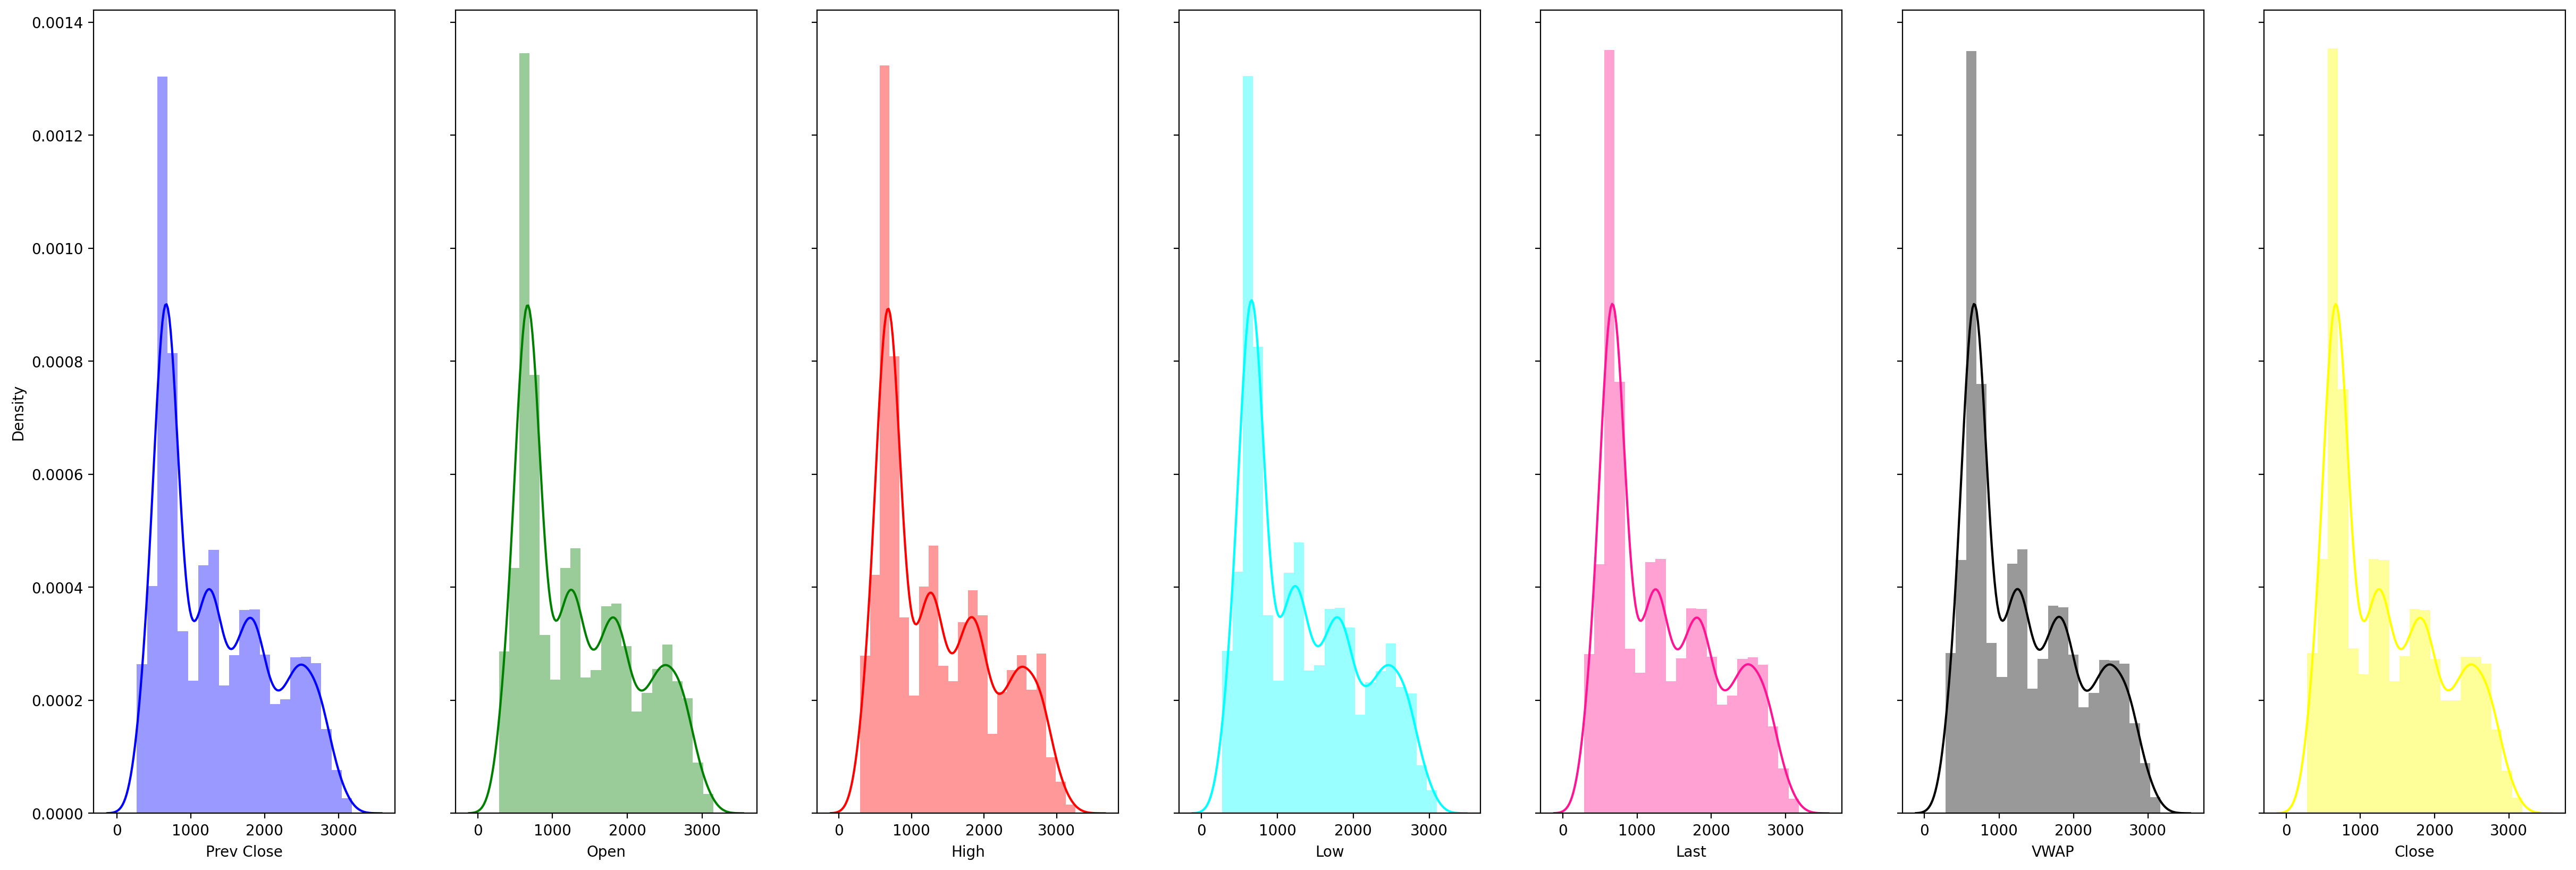

In [23]:
import matplotlib. pyplot as plt
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"], df["Close"]]
fig, axes = plt.subplots(1, 7, figsize=(30,10), sharey=True, dpi=200)
sns.distplot(columns[0] , color="blue", ax=axes[0], axlabel='Prev Close')
sns.distplot(columns[1] , color="green", ax=axes[1], axlabel='Open')
sns.distplot(columns[2] , color="red", ax=axes[2], axlabel='High')
sns.distplot(columns[3] , color="cyan", ax=axes[3], axlabel='Low')
sns.distplot(columns[4] , color="deeppink", ax=axes[4], axlabel='Last')
sns.distplot(columns[5] , color="black", ax=axes[5], axlabel='VWAP')
sns.distplot(columns[6] , color="yellow", ax=axes[6], axlabel='Close')
#plt.xlim(50,75);


In [24]:
for k in columns:
  print(k.skew(),'\n')

0.5614039867968256 

0.5597964097576372 

0.5608586793599332 

0.5603775139170383 

0.5605964485375495 

0.5601502284047819 

0.5609261700042687 



In [25]:

for k in columns:
   print(k.kurt(),'\n')

-0.9350800527324257 

-0.939760700952788 

-0.9400987990347445 

-0.9330430425697762 

-0.9376431674910486 

-0.9381588238511078 

-0.9361906085931393 



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


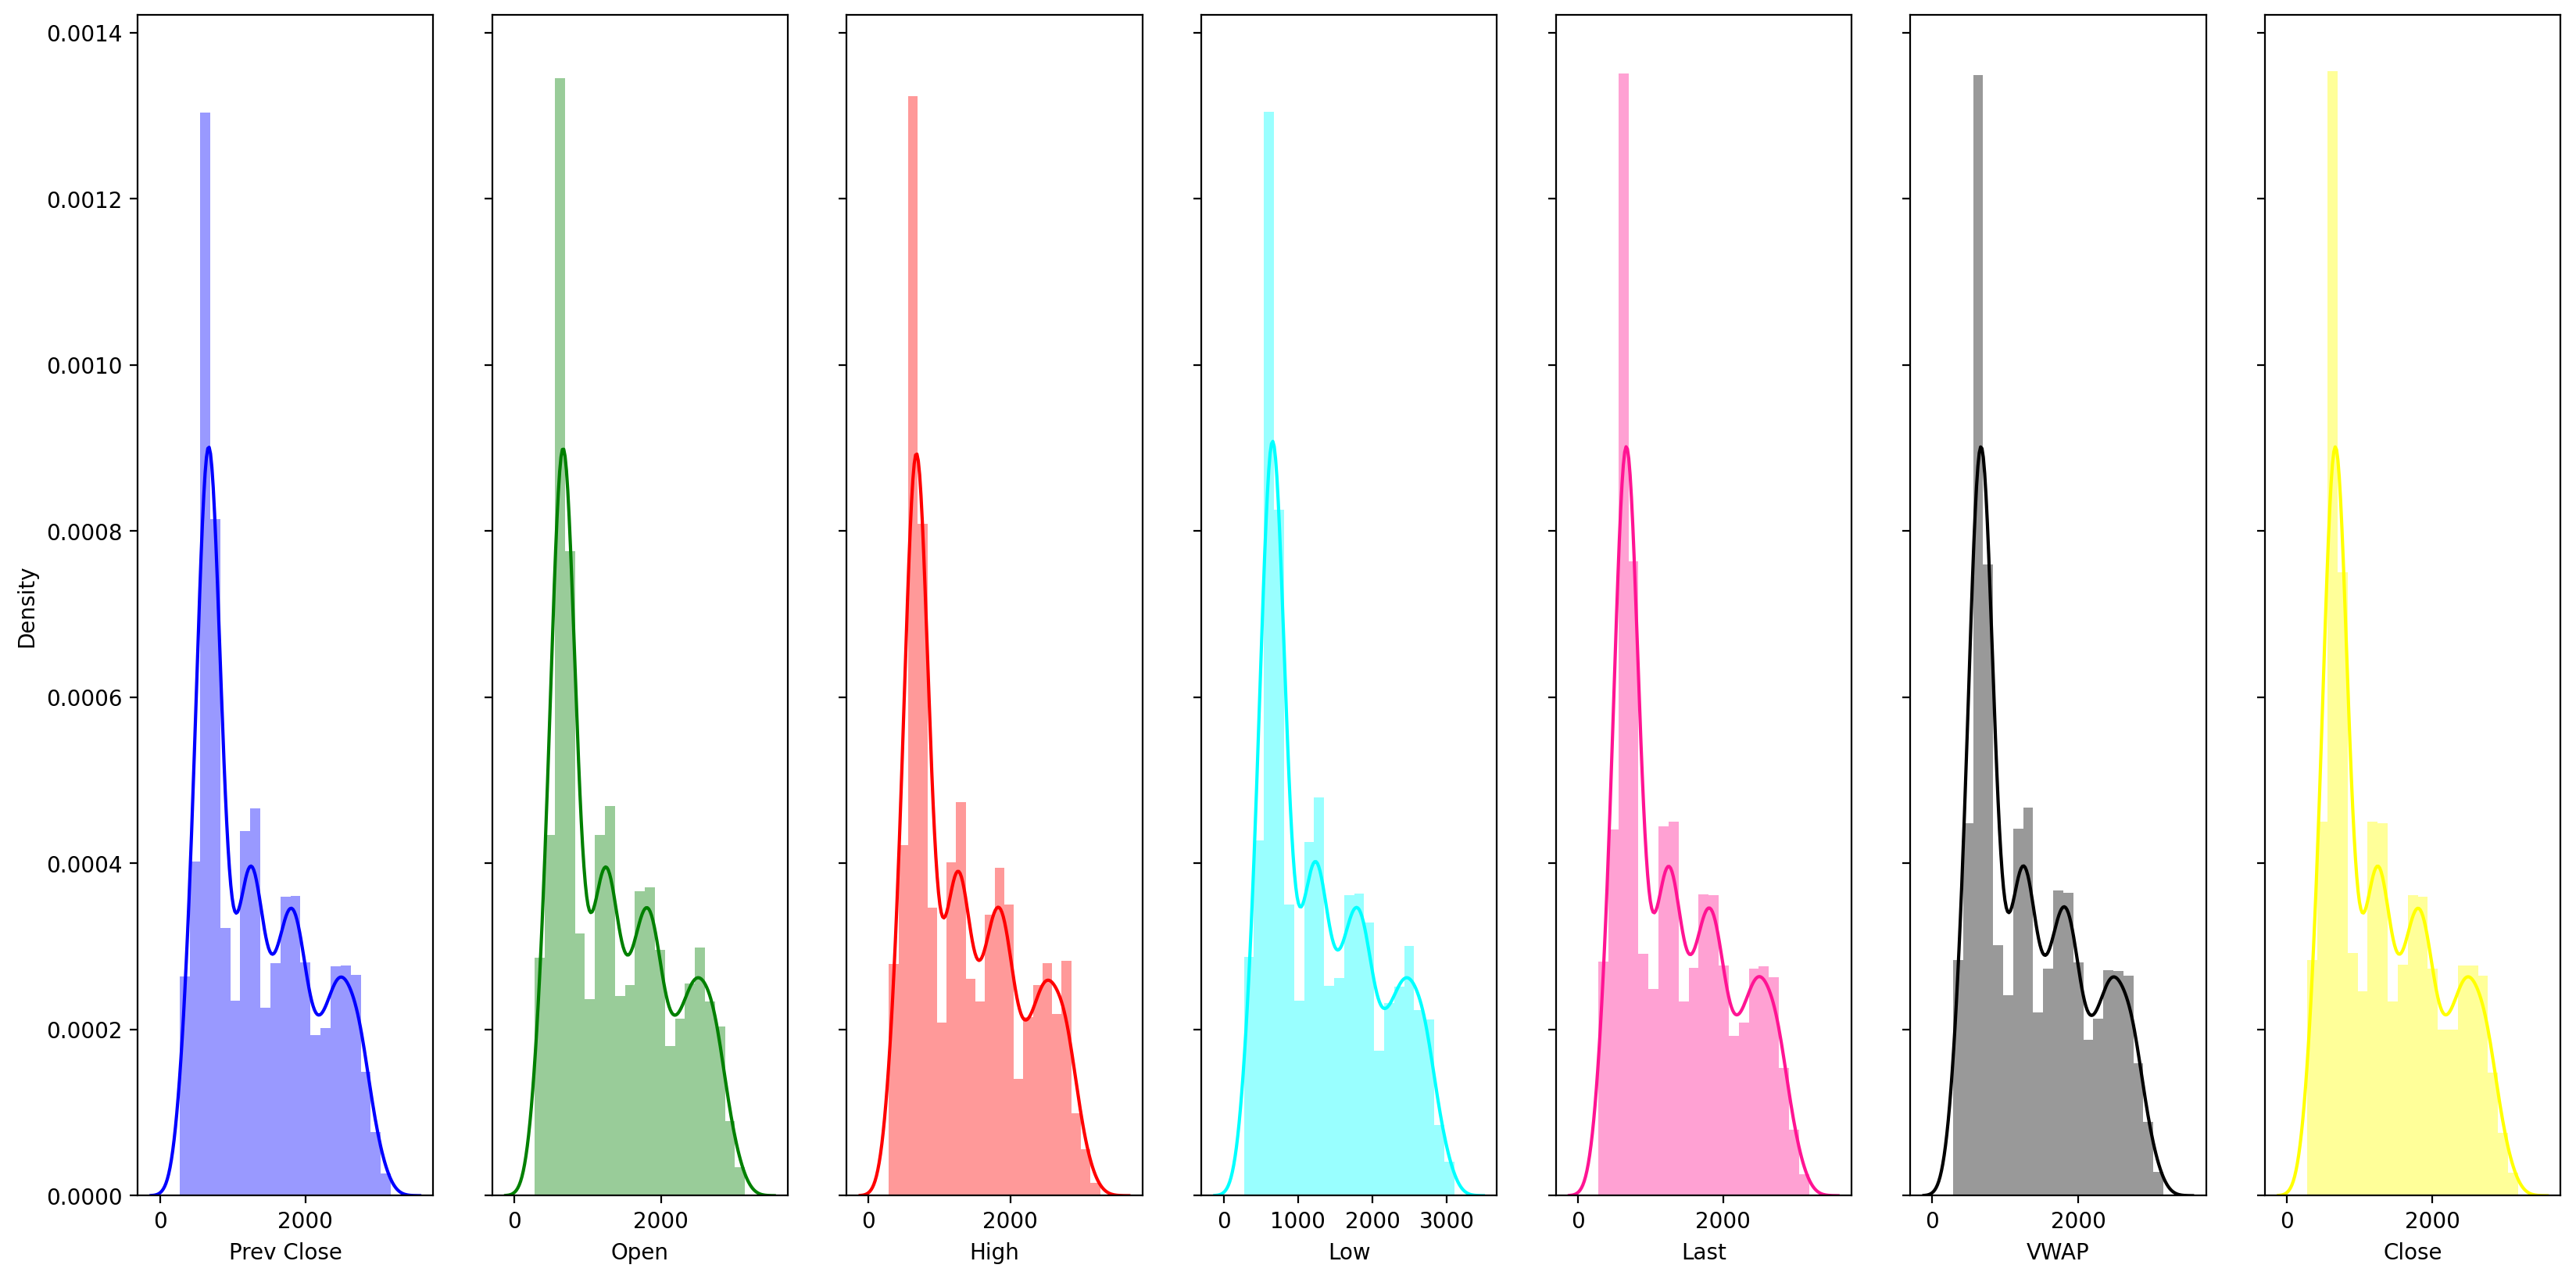

In [26]:
import matplotlib. pyplot as plt
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"], df["Close"]]
fig, axes = plt.subplots(1, 7, figsize=(20,10), sharey=True, dpi=200)
sns.distplot(columns[0] , color="blue", ax=axes[0], axlabel='Prev Close')
sns.distplot(columns[1] , color="green", ax=axes[1], axlabel='Open')
sns.distplot(columns[2] , color="red", ax=axes[2], axlabel='High')
sns.distplot(columns[3] , color="cyan", ax=axes[3], axlabel='Low')
sns.distplot(columns[4] , color="deeppink", ax=axes[4], axlabel='Last')
sns.distplot(columns[5] , color="black", ax=axes[5], axlabel='VWAP')
sns.distplot(columns[6] , color="yellow", ax=axes[6], axlabel='Close')

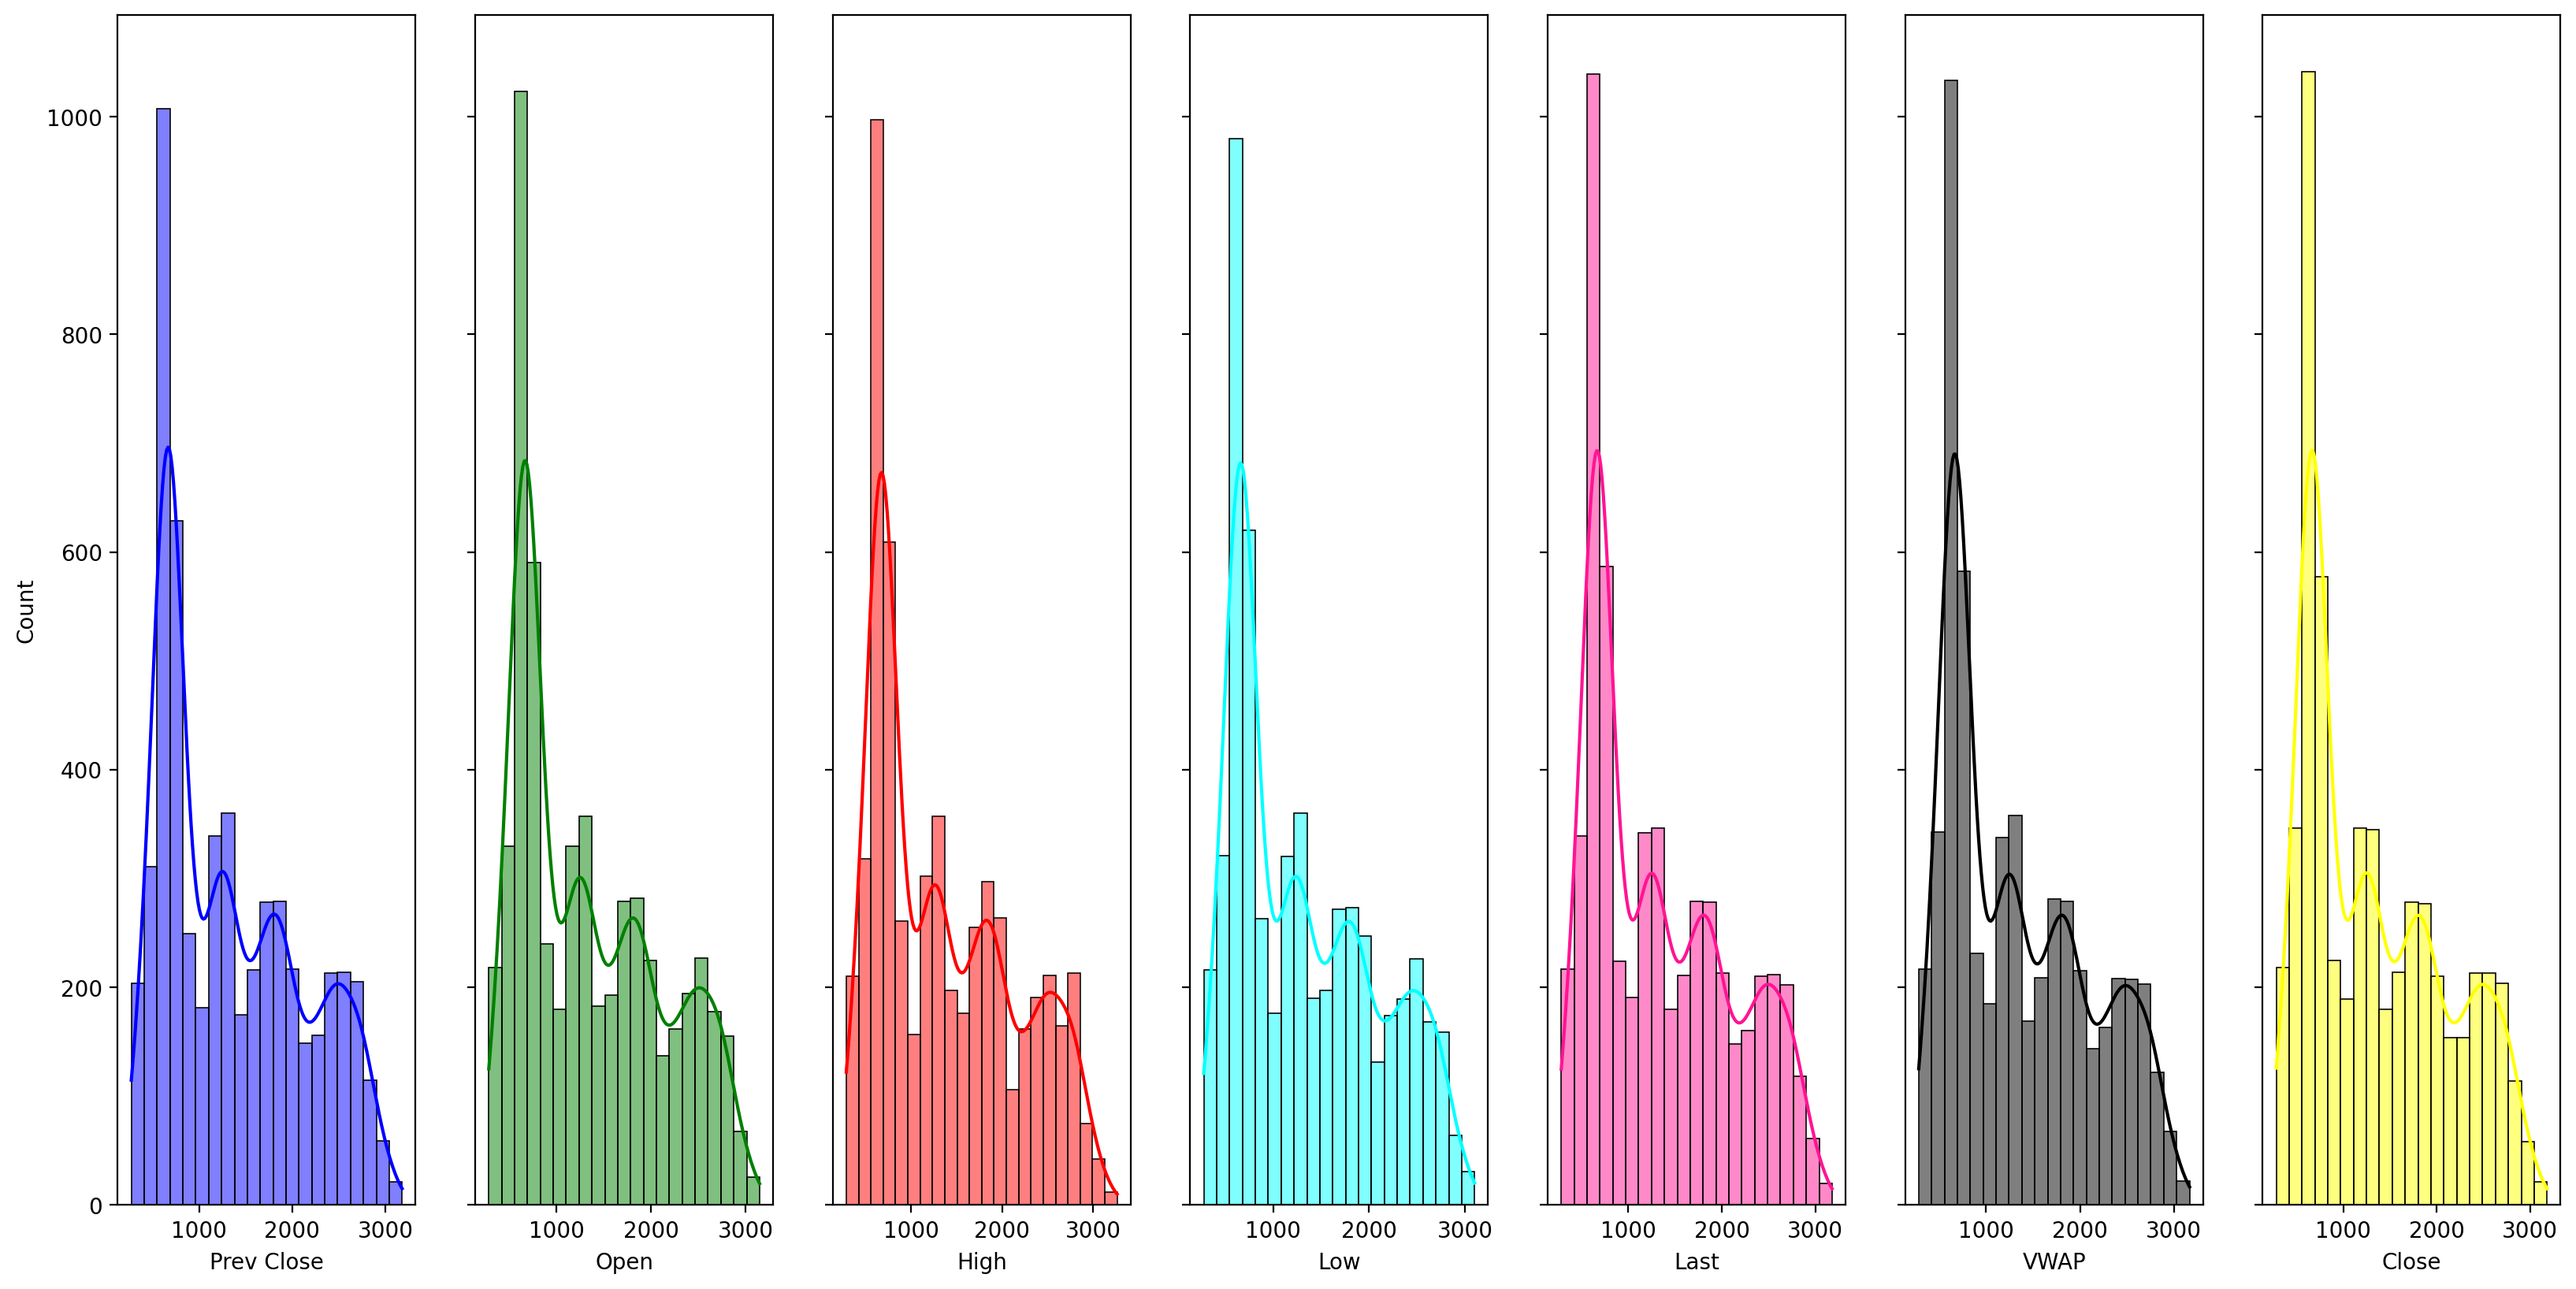

In [27]:
import matplotlib. pyplot as plt
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"], df["Close"]]
fig, axes = plt.subplots(1, 7, figsize=(20,10), sharey=True, dpi=200)
sns.histplot(columns[0] , color="blue", ax=axes[0], kde = True)
sns.histplot(columns[1] , color="green", ax=axes[1], kde = True)
sns.histplot(columns[2] , color="red", ax=axes[2], kde = True)
sns.histplot(columns[3] , color="cyan", ax=axes[3], kde = True)
sns.histplot(columns[4] , color="deeppink", ax=axes[4], kde = True)
sns.histplot(columns[5] , color="black", ax=axes[5], kde = True)
sns.histplot(columns[6] , color="yellow", ax=axes[6], kde = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


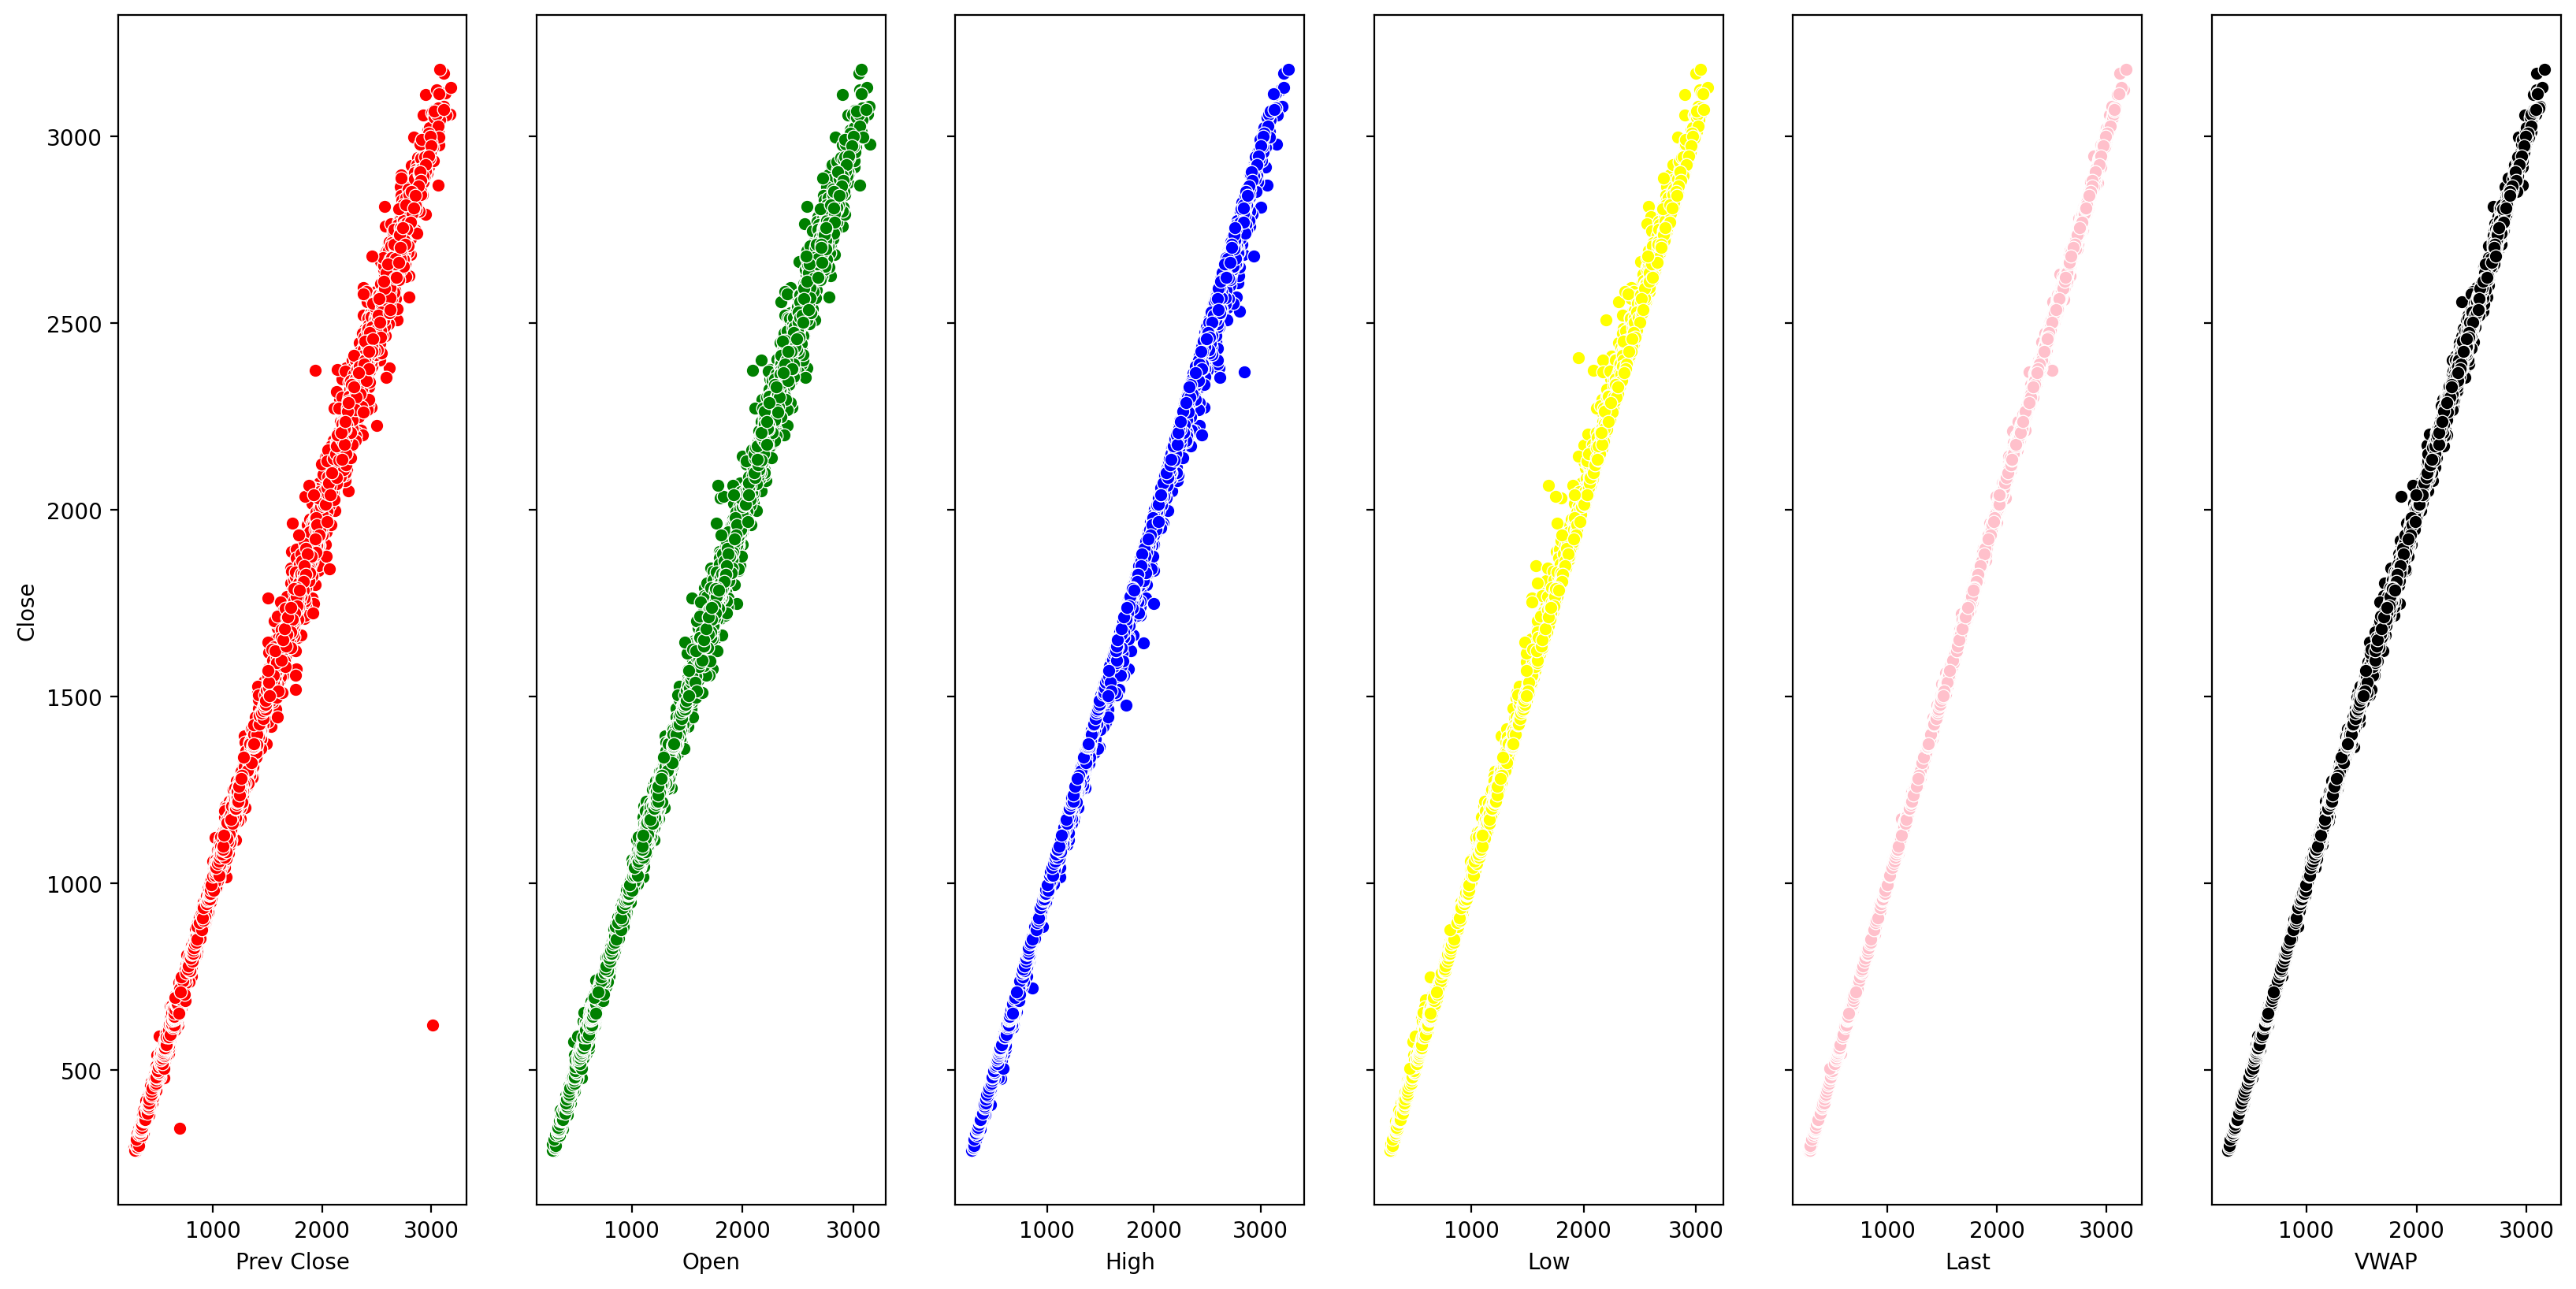

In [28]:
import matplotlib. pyplot as plt
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"]]
colours=["red","green","blue","yellow","pink","black"]
fig, axes = plt.subplots(1,6, figsize=(20,10), sharey=True, dpi=200)
sns.scatterplot(columns[0], df["Close"],color = colours[0],ax=axes[0])
sns.scatterplot(columns[1], df["Close"],color = colours[1],ax=axes[1])
sns.scatterplot(columns[2], df["Close"],color = colours[2],ax=axes[2])
sns.scatterplot(columns[3], df["Close"],color = colours[3],ax=axes[3])
sns.scatterplot(columns[4], df["Close"],color = colours[4],ax=axes[4])
sns.scatterplot(columns[5], df["Close"],color = colours[5],ax=axes[5])

In [29]:
Close_list = df['Close'].tolist()
total=len(Close_list);

In [30]:
DIFF=[]
PERCDIFF=[]
TARGET=[]
counter=0
for i in range(0,total):
  #print("i is",i)
  diff=Close_list[i]-Close_list[i-1]
  DIFF.append(diff)
  percdiff=(diff*100)/Close_list[i]
  PERCDIFF.append(percdiff)
  if(percdiff>0.5):
    TARGET.append('pos')
  else:
    TARGET.append('notpos')

In [31]:
df1=pd.DataFrame(DIFF)
df2=pd.DataFrame(PERCDIFF)
df3=pd.DataFrame(TARGET)
df['DIFF']=df1
df['PERCDIFF']=df2
df['TARGET']=df3
df=df[1:]

In [32]:
#DUMMY CODING USING THE LOOP STRUCTURE
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=pd.Categorical(df[col]).codes
df.head(5)

<ipython-input-32-a26379bbb8f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=pd.Categorical(df[col]).codes


Prev Close   Open    High    Low   Last   Close    VWAP  Volume  \
1      293.50  317.0  317.00  297.0  304.0  304.05  303.62  255251   
2      304.05  290.0  303.90  285.0  295.0  292.80  294.53  269087   
3      292.80  301.0  314.00  295.0  296.0  296.45  300.14  305916   
4      296.45  290.0  296.35  281.0  287.1  286.55  288.80  197039   
5      286.55  292.0  296.00  285.0  288.4  287.20  289.42  133363   

       Turnover  Prev_Close_list  Open_list  High_list  Low_list  Last_list  \
1  7.749972e+12                0          0          0         0          0   
2  7.925368e+12                0          0          0         0          0   
3  9.181669e+12                0          0          0         0          0   
4  5.690480e+12                0          0          0         0          0   
5  3.859779e+12                0          0          0         0          0   

   VWAP_list  Close_list   DIFF  PERCDIFF  TARGET  
1          0           0  10.55  3.469824       1  
2          0           0 -11.25 -3.842213       0  
3          0           0   3.65  1.231236       1  
4          0           0  -9.90 -3.454894       0  
5          0           0   0.65  0.226323       0

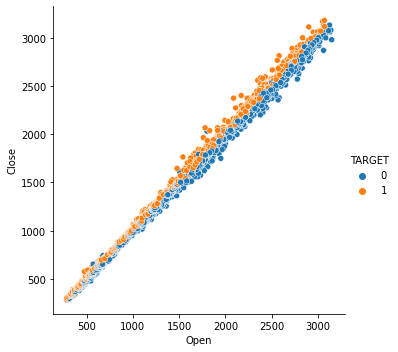

In [33]:
sns.relplot(x='Open', y='Close', hue='TARGET', data=df)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

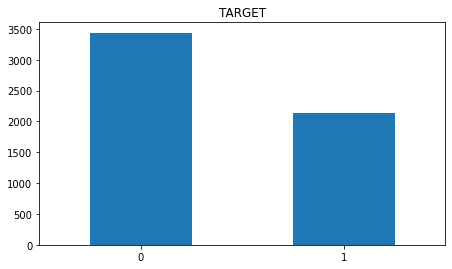

In [34]:
plt.subplot(221)

df['TARGET'].value_counts().plot(kind='bar', title='TARGET', figsize=(16,9))

plt.xticks(rotation=0)

In [ ]:
!jupyter nbconvert Data_UnderstandingHDFC_Dataset.ipynb